### Name: Bhargavi Poyekar
### BE COMPS - Batch C
### UID: 2018130040

# AISC LAB 4


## AIM: To implement Multilayer Perceptron Learning algorithm.

## CODE:

In [27]:
#import libraries
import math
import pandas as pd
import matplotlib.pyplot as plt

###Initializing inputs, weights and biases

In [28]:
x=[0,1] # inputs
t=1 # target output

## weights and last column is bias
v1=[0.5,-0.2,0.3] 
v2=[-0.4,0.6,0.1]
w=[0.7,0.2,-0.3]
alpha=0.25

#list for all updates weights and table
wts=[]
wts.append([w[0],w[1],w[2],v1[0],v1[1],v1[2],v2[0],v2[1],v2[2]])


###Activation Function : Binary Sigmoidal

In [29]:
def bin_sigm(yin):
  eyin=math.exp(-yin)
  y=1/(1+eyin)
  return (round(y,4))

###Net input

In [30]:
def net_ip(wt,ip):
  n_inp=wt[2]+ip[0]*wt[0]+ip[1]*wt[1]
  return round(n_inp,4)

###Derivative of f

In [31]:
def f_deriv(y):
  return round(y*(1-y),4)

###Change in weights

In [32]:
def change_wts(delta, wt, ip):
  delta_w=[0]*3
  delta_w[0]=round(alpha*delta*ip[0],6)
  delta_w[1]=round(alpha*delta*ip[1],6)
  delta_w[2]=round(alpha*delta,4) # bias
  return delta_w

###Update weights

In [33]:
def update(delta,wts):
  u_wts=[0]*3
  for i in range(len(delta)):
    u_wts[i]=round(wts[i]+delta[i],5)
  return u_wts

###Back Propogation Network

In [34]:
epochs=300
error_tab=[]
deltas=[]
for i in range(epochs):
  print(f'\nEpoch {i+1}: ')
  zin1=net_ip(v1,x)
  print(f'zin1: {zin1}')
  zin2=net_ip(v2,x)
  print(f'zin2: {zin2}')
  z1=bin_sigm(zin1)
  z2=bin_sigm(zin2)
  print(f'z1: {z1}')
  print(f'z2: {z2}')
  z=[z1,z2]
  yin=net_ip(w,z)
  print(f'yin: {yin}')
  y=bin_sigm(yin)
  print(f'y: {y}')


  delta=round((t-y)*f_deriv(y),4)
  deltas.append(delta)
  delta_w=change_wts(delta,w,z)

  #error for portion between input and hidden layer
  delta_in1=delta*w[0]
  delta_in2=delta*w[1]

  delta1=round(delta_in1*f_deriv(z1),4)
  delta2=round(delta_in2*f_deriv(z2),4)

  delta_v1=change_wts(delta1,v1,x)
  delta_v2=change_wts(delta2,v2,x)
  error_tab.append([delta,delta1,delta2])
  w=update(delta_w,w)
  v1=update(delta_v1,v1)
  v2=update(delta_v2,v2)
  wts.append([w[0],w[1],w[2],v1[0],v1[1],v1[2],v2[0],v2[1],v2[2]])





Epoch 1: 
zin1: 0.1
zin2: 0.7
z1: 0.525
z2: 0.6682
yin: 0.2011
y: 0.5501

Epoch 2: 
zin1: 0.1098
zin2: 0.7024
z1: 0.5274
z2: 0.6687
yin: 0.2509
y: 0.5624

Epoch 3: 
zin1: 0.1193
zin2: 0.705
z1: 0.5298
z2: 0.6693
yin: 0.2992
y: 0.5742

Epoch 4: 
zin1: 0.1288
zin2: 0.7078
z1: 0.5322
z2: 0.6699
yin: 0.3461
y: 0.5857

Epoch 5: 
zin1: 0.138
zin2: 0.7106
z1: 0.5344
z2: 0.6705
yin: 0.3914
y: 0.5966

Epoch 6: 
zin1: 0.1472
zin2: 0.7135
z1: 0.5367
z2: 0.6712
yin: 0.4355
y: 0.6072

Epoch 7: 
zin1: 0.1562
zin2: 0.7164
z1: 0.539
z2: 0.6718
yin: 0.4782
y: 0.6173

Epoch 8: 
zin1: 0.165
zin2: 0.7195
z1: 0.5412
z2: 0.6725
yin: 0.5196
y: 0.6271

Epoch 9: 
zin1: 0.1736
zin2: 0.7225
z1: 0.5433
z2: 0.6732
yin: 0.5595
y: 0.6363

Epoch 10: 
zin1: 0.182
zin2: 0.7255
z1: 0.5454
z2: 0.6738
yin: 0.5982
y: 0.6452

Epoch 11: 
zin1: 0.1902
zin2: 0.7286
z1: 0.5474
z2: 0.6745
yin: 0.6357
y: 0.6538

Epoch 12: 
zin1: 0.1982
zin2: 0.7316
z1: 0.5494
z2: 0.6752
yin: 0.672
y: 0.662

Epoch 13: 
zin1: 0.206
zin2: 0.7347
z1

### Error Table for all epochs

In [35]:
error_tab=pd.DataFrame(error_tab, columns =['Delta', 'Delta1', 'Delta2'])

error_tab

,Delta,Delta1,Delta2
0,0.1114,0.0194,0.0049
1,0.1077,0.0192,0.0052
2,0.1041,0.0189,0.0055
3,0.1006,0.0186,0.0057
4,0.0971,0.0183,0.0058
...,...,...,...
295,0.0037,0.0012,0.0008
296,0.0037,0.0012,0.0008
297,0.0037,0.0012,0.0008
298,0.0037,0.0012,0.0008


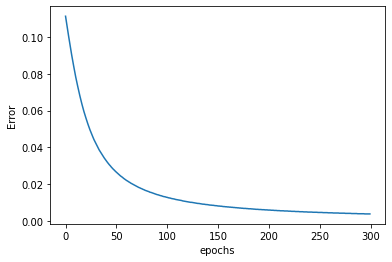

In [36]:

plt.plot(deltas)
plt.xlabel('epochs')
plt.ylabel('Error')
plt.show()

### Updated Weights and Biases for all epochs

In [37]:
wts=pd.DataFrame(wts,columns=['w1','w2','w0','v11','v21','v01','v12','v22','v02'])
wts

,w1,w2,w0,v11,v21,v01,v12,v22,v02
0,0.70000,0.20000,-0.3000,0.5,-0.20000,0.3000,-0.4,0.60000,0.1000
1,0.71462,0.21861,-0.2722,0.5,-0.19515,0.3049,-0.4,0.60123,0.1012
2,0.72882,0.23661,-0.2453,0.5,-0.19035,0.3097,-0.4,0.60253,0.1025
3,0.74261,0.25403,-0.2193,0.5,-0.18562,0.3144,-0.4,0.60391,0.1039
4,0.75599,0.27088,-0.1942,0.5,-0.18097,0.3190,-0.4,0.60533,0.1053
...,...,...,...,...,...,...,...,...,...
296,1.43952,1.06715,0.9468,0.5,0.11195,0.6097,-0.4,0.76195,0.2608
297,1.44014,1.06783,0.9477,0.5,0.11225,0.6100,-0.4,0.76215,0.2610
298,1.44076,1.06851,0.9486,0.5,0.11255,0.6103,-0.4,0.76235,0.2612
299,1.44138,1.06919,0.9495,0.5,0.11285,0.6106,-0.4,0.76255,0.2614
